In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as function
from torchvision import transforms,datasets
from torch.utils.data import DataLoader
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import os
%matplotlib inline


In [3]:
#input_path = 'AugmentedAlzheimerDataset/'

#splitfolders.ratio(input_path,output="Augmented_imageset",seed=41,ratio=(.7,.2,.1),group_prefix=None)


In [4]:
train_path_folder = 'Augmented_imageset/train/'
test_path_folder = 'Augmented_imageset/test/'
validation_path_folder = 'Augmented_imageset/val/'

In [5]:
transform = transforms.Compose([
    transforms.Resize((256,256)),
    transforms.ToTensor()
])

In [6]:
train_data = datasets.ImageFolder(train_path_folder,transform=transform)
test_data = datasets.ImageFolder(test_path_folder,transform=transform)
validation_data = datasets.ImageFolder(validation_path_folder,transform=transform)

In [7]:
train_data

Dataset ImageFolder
    Number of datapoints: 23788
    Root location: Augmented_imageset/train/
    StandardTransform
Transform: Compose(
               Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

In [8]:
test_data

Dataset ImageFolder
    Number of datapoints: 3400
    Root location: Augmented_imageset/test/
    StandardTransform
Transform: Compose(
               Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

In [9]:
validation_data

Dataset ImageFolder
    Number of datapoints: 6796
    Root location: Augmented_imageset/val/
    StandardTransform
Transform: Compose(
               Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

In [10]:
train_load = DataLoader(train_data,batch_size=64,shuffle =True)
validation_load = DataLoader(validation_data,batch_size=64,shuffle=False)
test_load = DataLoader(test_data,batch_size=64,shuffle=False)

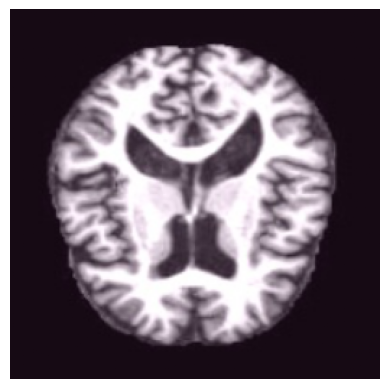

 train_value is 0


In [11]:
def show_image(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

train_image,train_label = train_data[120]
show_image(train_image.permute(1,2,0))
print(f" train_value is {train_label}")

In [12]:
for i,(x_train,y_train) in enumerate(train_data):
    break

x_train.shape

torch.Size([3, 256, 256])

In [13]:
x = x_train.view(1,3,256,256)

In [14]:
conv1 = nn.Conv2d(3,7,3,1)
conv2 = nn.Conv2d(7,17,3,1)
conv3 = nn.Conv2d(17,37,3,1)
conv4 = nn.Conv2d(37,73,3,1)

In [15]:
x = function.relu(conv1(x))
print(f"x.shape after 1st convolution{x.shape}")
x = torch.max_pool2d(x,2,2)
print(f"x shape after 1st padding is {x.shape}")

x = function.relu(conv2(x))
print(f"x.shape after 2nd convolution{x.shape}")
x = torch.max_pool2d(x,2,2)
print(f"x shape after 2nd padding is {x.shape}")

x = function.relu(conv3(x))
print(f"x.shape after 3rd convolution{x.shape}")
x = torch.max_pool2d(x,2,2)
print(f"x shape after 3rd padding is {x.shape}")

x = function.relu(conv4(x))

print(f"x.shape after 4th convolution{x.shape}")
x = torch.max_pool2d(x,2,2)
print(f"x shape after 4th padding is {x.shape}")

print(f" X shape is {x.shape}")
x = torch.flatten(x)
print(f"x shape after flattening is {x.shape}")

x.shape after 1st convolutiontorch.Size([1, 7, 254, 254])
x shape after 1st padding is torch.Size([1, 7, 127, 127])
x.shape after 2nd convolutiontorch.Size([1, 17, 125, 125])
x shape after 2nd padding is torch.Size([1, 17, 62, 62])
x.shape after 3rd convolutiontorch.Size([1, 37, 60, 60])
x shape after 3rd padding is torch.Size([1, 37, 30, 30])
x.shape after 4th convolutiontorch.Size([1, 73, 28, 28])
x shape after 4th padding is torch.Size([1, 73, 14, 14])
 X shape is torch.Size([1, 73, 14, 14])
x shape after flattening is torch.Size([14308])


In [16]:
fc1 = nn.Linear(14308,8000)
fc2 = nn.Linear(8000,3000)
fc3 = nn.Linear(3000,500)
fc4 = nn.Linear(500,30)
fc5 = nn.Linear(30,4)

x = function.relu(fc1(x))
x = function.relu(fc2(x))
x = function.relu(fc3(x))
x = function.relu(fc4(x))
x = function.softmax(fc5(x))
print(x)
print(x.argmax())
print(train_label)
print(f" have they matched {x.argmax()==train_label}")

tensor([0.2373, 0.2415, 0.2759, 0.2454], grad_fn=<SoftmaxBackward0>)
tensor(2)
0
 have they matched False


C:\Users\adarshpatel\AppData\Local\Temp\ipykernel_7284\3393931364.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = function.softmax(fc5(x))


In [17]:
class alzhemiers_Model(nn.Module):
    def __init__(self):
        super(alzhemiers_Model,self).__init__()
        self.convolution_layer1 = nn.Conv2d(in_channels=3,out_channels=7,kernel_size = 3,stride=1)
        self.bn1 = nn.BatchNorm2d(7)
        self.convolution_layer2 = nn.Conv2d(in_channels=7,out_channels=17,kernel_size=3,stride=1)
        self.bn2 = nn.BatchNorm2d(17)
        self.convolution_layer3 = nn.Conv2d(in_channels=17,out_channels=37,kernel_size = 3,stride=1)
        self.bn3 = nn.BatchNorm2d(37)
        self.convolution_layer4 = nn.Conv2d(in_channels=37,out_channels=73,kernel_size=3,stride=1)
        self.bn4 = nn.BatchNorm2d(73)
        self.fc1 = nn.Linear(in_features=14*14*73,out_features=8000)
        self.fc2 = nn.Linear(in_features = 8000,out_features = 3000)
        self.fc3 = nn.Linear(in_features = 3000,out_features = 500)
        self.fc4 = nn.Linear(in_features = 500,out_features = 30)
        self.fc5 = nn.Linear(in_features = 30 ,out_features = 4)

    def forward(self,x):
        x = self.bn1(function.relu(self.convolution_layer1(x)))
        x = torch.max_pool2d(x,kernel_size=2,stride =2)
        x = self.bn2(function.relu(self.convolution_layer2(x)))
        x = torch.max_pool2d(x,kernel_size=2,stride =2)
        x = self.bn3(function.relu(self.convolution_layer3(x)))
        x = torch.max_pool2d(x,kernel_size=2,stride =2)
        x = self.bn4(function.relu(self.convolution_layer4(x)))
        x = torch.max_pool2d(x,kernel_size=2,stride =2)

        #to flatten rather than flatten() we use x.view(-1,size)
        x = x.view(-1,14308)

        #passing to fully connected layers
        x = function.relu(self.fc1(x))
        x = function.relu(self.fc2(x))
        x = function.relu(self.fc3(x))
        x = function.relu(self.fc4(x))
        x = self.fc5(x)

        return function.log_softmax(x,dim=1)

In [18]:
torch.manual_seed(41)

In [19]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
model = alzhemiers_Model().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

Using device: cuda:0


In [20]:
import time as t
start_time = t.time()

train_loss=[]
train_correct =[]
val_loss=[]
val_correct=[]

epochs = 20

for i in range(epochs):
    trn_crt=0
    val_crt=0
    #training part
    for batches,(x_train,y_train) in enumerate(train_load):
        batches+=1 
        x_train, y_train = x_train.to(device), y_train.to(device)
        y_predicted = model(x_train)
        loss = criterion(y_predicted,y_train)
        predicted = torch.max(y_predicted.data,1)[1] 
        batch_correct = (predicted==y_train).sum()

        #summing that to trained correct of that epoch
        trn_crt+=batch_correct

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if(batches%100==0):
            print(f"epoch {i+1} train batch no {batches} has a loss of {loss}")
            train_loss.append(loss)
    
    train_correct.append(trn_crt)

    #validation part
    with torch.no_grad():
        for batches,(x_val,y_val) in enumerate(validation_load):
            x_val, y_val = x_val.to(device), y_val.to(device)
            batches+=1
            y_predicted = model(x_val)
            loss = criterion(y_predicted,y_val)
            predicted = torch.max(y_predicted.data,1)[1]
            batch_correct = (predicted==y_val).sum()
            
            val_crt+=batch_correct
            if(batches%50==0):
                print(f"epoch {i+1} test batch no {batches} has a loss of {loss}")
                val_loss.append(loss)
                
        val_correct.append(val_crt)

end_time = t.time()
print(f"Time consumed is so many seconds {end_time-start_time}")

epoch 1 train batch no 100 has a loss of 0.8215092420578003
epoch 1 train batch no 200 has a loss of 0.7238136529922485
epoch 1 train batch no 300 has a loss of 0.6645349860191345
epoch 1 test batch no 50 has a loss of 0.8731481432914734
epoch 1 test batch no 100 has a loss of 0.7657956480979919
epoch 2 train batch no 100 has a loss of 0.7260920405387878
epoch 2 train batch no 200 has a loss of 0.2506905198097229
epoch 2 train batch no 300 has a loss of 0.4633049964904785
epoch 2 test batch no 50 has a loss of 0.6253893971443176
epoch 2 test batch no 100 has a loss of 0.3035165071487427
epoch 3 train batch no 100 has a loss of 0.2592725455760956
epoch 3 train batch no 200 has a loss of 0.467771977186203
epoch 3 train batch no 300 has a loss of 0.23034538328647614
epoch 3 test batch no 50 has a loss of 0.20065917074680328
epoch 3 test batch no 100 has a loss of 0.48015978932380676
epoch 4 train batch no 100 has a loss of 0.085211843252182
epoch 4 train batch no 200 has a loss of 0.21391

In [21]:
[examples/len(train_data) for examples in train_correct]

[tensor(0.5942, device='cuda:0'),
 tensor(0.8146, device='cuda:0'),
 tensor(0.9010, device='cuda:0'),
 tensor(0.9441, device='cuda:0'),
 tensor(0.9664, device='cuda:0'),
 tensor(0.9786, device='cuda:0'),
 tensor(0.9847, device='cuda:0'),
 tensor(0.9824, device='cuda:0'),
 tensor(0.9907, device='cuda:0'),
 tensor(0.9926, device='cuda:0'),
 tensor(0.9879, device='cuda:0'),
 tensor(0.9936, device='cuda:0'),
 tensor(0.9924, device='cuda:0'),
 tensor(0.9891, device='cuda:0'),
 tensor(0.9904, device='cuda:0'),
 tensor(0.9960, device='cuda:0'),
 tensor(0.9949, device='cuda:0'),
 tensor(0.9934, device='cuda:0'),
 tensor(0.9881, device='cuda:0'),
 tensor(0.9908, device='cuda:0')]

In [22]:
[examples/len(validation_data) for examples in val_correct]

[tensor(0.6970, device='cuda:0'),
 tensor(0.8240, device='cuda:0'),
 tensor(0.8583, device='cuda:0'),
 tensor(0.8883, device='cuda:0'),
 tensor(0.8938, device='cuda:0'),
 tensor(0.9013, device='cuda:0'),
 tensor(0.9083, device='cuda:0'),
 tensor(0.9154, device='cuda:0'),
 tensor(0.9110, device='cuda:0'),
 tensor(0.9099, device='cuda:0'),
 tensor(0.9083, device='cuda:0'),
 tensor(0.9089, device='cuda:0'),
 tensor(0.9001, device='cuda:0'),
 tensor(0.9070, device='cuda:0'),
 tensor(0.9295, device='cuda:0'),
 tensor(0.9145, device='cuda:0'),
 tensor(0.9120, device='cuda:0'),
 tensor(0.8943, device='cuda:0'),
 tensor(0.8898, device='cuda:0'),
 tensor(0.8970, device='cuda:0')]

In [23]:
testing_all = DataLoader(test_data,batch_size=128,shuffle=False)
noOfCorrect =0
with torch.no_grad():
    for x_test,y_test in testing_all:
        x_test = x_test.to(device)
        y_test = y_test.to(device)
        y_predicted = model(x_test)
        loss_faced = criterion(y_predicted,y_test)
        print(f"loss faced is {loss_faced}")
        actual_predicted = torch.max(y_predicted.data,1)[1]
        noOfCorrect += (actual_predicted==y_test).sum()
        print(f"Accuracy is {noOfCorrect/len(test_data)*100}")


loss faced is 0.17096543312072754
tensor(3.5882, device='cuda:0')
loss faced is 0.14270058274269104
tensor(7.1471, device='cuda:0')
loss faced is 0.09070056676864624
tensor(10.7647, device='cuda:0')
loss faced is 0.27915313839912415
tensor(14.2353, device='cuda:0')
loss faced is 0.12215712666511536
tensor(17.9118, device='cuda:0')
loss faced is 0.08919714391231537
tensor(21.5588, device='cuda:0')
loss faced is 0.11074211448431015
tensor(25.1471, device='cuda:0')
loss faced is 0.007949864491820335
tensor(28.9118, device='cuda:0')
loss faced is 0.00762395653873682
tensor(32.6765, device='cuda:0')
loss faced is 0.013494201004505157
tensor(36.4412, device='cuda:0')
loss faced is 0.0012193858856335282
tensor(40.2059, device='cuda:0')
loss faced is 0.0007068550330586731
tensor(43.9706, device='cuda:0')
loss faced is 0.5028989315032959
tensor(47.4412, device='cuda:0')
loss faced is 0.8008484840393066
tensor(50.6176, device='cuda:0')
loss faced is 0.221788689494133
tensor(54.1176, device='cuda

In [24]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1) 
    return torch.tensor(torch.sum(preds == labels).item() / len(preds)), preds

In [25]:
def validation_step(batch):
        images,labels = batch
        images,labels = images.to(device),labels.to(device)
        out = model(images)                                      
        loss = function.cross_entropy(out, labels)                    
        acc,preds = accuracy(out, labels)                       
        
        return {'val_loss': loss.detach(), 'val_acc':acc.detach(), 
                'preds':preds.detach(), 'labels':labels.detach()}

In [26]:
def test_prediction(outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()           
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()             
     # combine predictions
    batch_preds = [pred for x in outputs for pred in x['preds'].tolist()] 
     # combine labels
    batch_labels = [lab for x in outputs for lab in x['labels'].tolist()]  
        
    return {'test_loss': epoch_loss.item(), 'test_acc': epoch_acc.item(),
                'test_preds': batch_preds, 'test_labels': batch_labels}

In [27]:
@torch.no_grad()
def test_predict(model, test_loader):
    model.eval()
    # perform testing for each batch
    outputs = [validation_step(batch) for batch in test_loader] 
    results = test_prediction(outputs)                          
    print('test_loss: {:.4f}, test_acc: {:.4f}'
          .format(results['test_loss'], results['test_acc']))
    
    return results['test_preds'], results['test_labels']

In [28]:
test_dl = DataLoader(test_data, batch_size=128)
model.to(device)
preds,labels = test_predict(model, test_dl)

test_loss: 0.4429, test_acc: 0.9105


<Figure size 640x480 with 0 Axes>

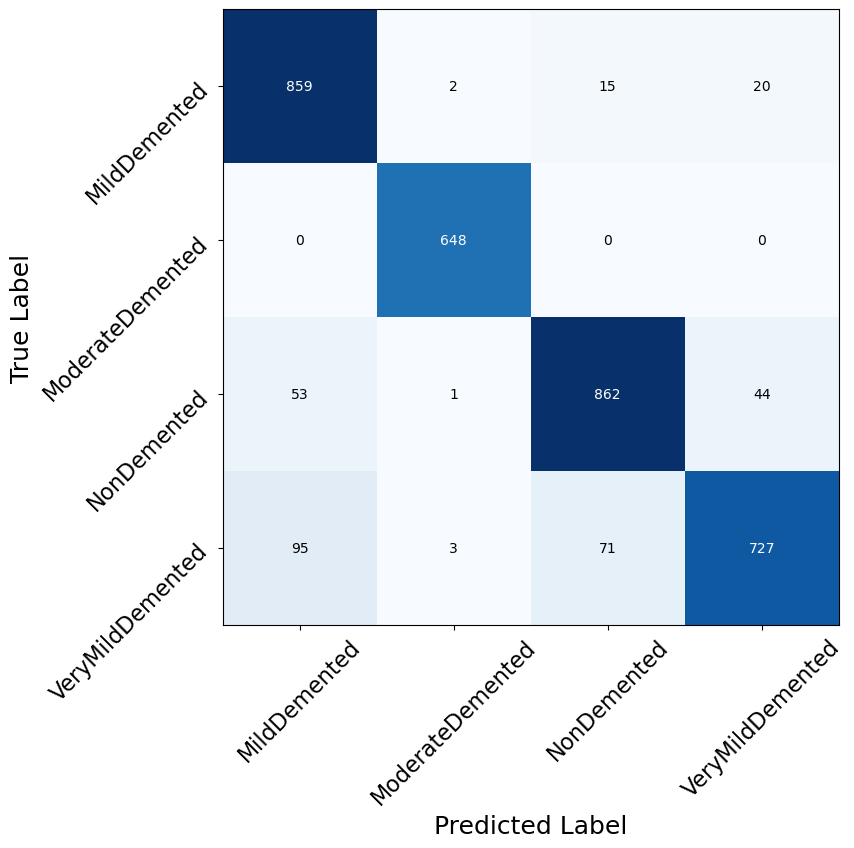

In [29]:
from mlxtend.plotting import plot_confusion_matrix
cm  = confusion_matrix(labels, preds)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), cmap=plt.cm.Blues)
plt.xticks(range(4), ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'],rotation=45,fontsize=16)
plt.yticks(range(4), ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'],rotation=45,fontsize=16)
plt.xlabel('Predicted Label', fontsize=18)
plt.ylabel('True Label', fontsize=18)
plt.savefig('accuracy_images_folder/confusion_matrix.png', bbox_inches='tight')
plt.show()

In [30]:
test_input = test_data[938][0].unsqueeze(0).to(device)

with torch.no_grad():
    # Forward pass through the model
    test_image = model(test_input).squeeze()

# Move the result back to CPU and convert to numpy for further processing
predicted_class = test_image.detach().cpu().numpy().argmax()
print(predicted_class)
print(f"Actual class label is {test_data[938][1]}")

1
Actual class label is 1


In [31]:
torch.save(model.state_dict(),'model_custom.pt')

In [32]:
import pandas as pd
import seaborn as sns

In [33]:
path='../Augmented_imageset/'
train_path_folder = 'train'

In [34]:
test_input = test_data[938][0].unsqueeze(0).to(device)

with torch.no_grad():
    # Forward pass through the model
    test_image = model(test_input).squeeze()

# Move the result back to CPU and convert to numpy for further processing
predicted_class = test_image.detach().cpu().numpy().argmax()
print(predicted_class)
print(f"Actual class label is {test_data[938][1]}")

1
Actual class label is 1


In [35]:
import torch
from sklearn.metrics import roc_auc_score
from torch.nn.functional import softmax

In [36]:
model = alzhemiers_Model().to(device)
model.load_state_dict(torch.load('model_custom.pt'))
model.eval()

all_outputs = []
all_labels = []

for inputs, labels in test_dl:
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = model(inputs)
    all_outputs.append(softmax(outputs, dim=1).cpu().detach().numpy())
    all_labels.append(labels.cpu().numpy())

all_outputs = np.concatenate(all_outputs, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

In [37]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
all_labels = lb.fit_transform(all_labels)
auc_scores = []
for class_idx in range(all_outputs.shape[1]):  # iterate over the classes
    auc = roc_auc_score(all_labels[:, class_idx], all_outputs[:, class_idx])
    auc_scores.append(auc)

average_auc = sum(auc_scores) / len(auc_scores)
print('Average AUC: ', average_auc)

Average AUC:  0.9866570428097191


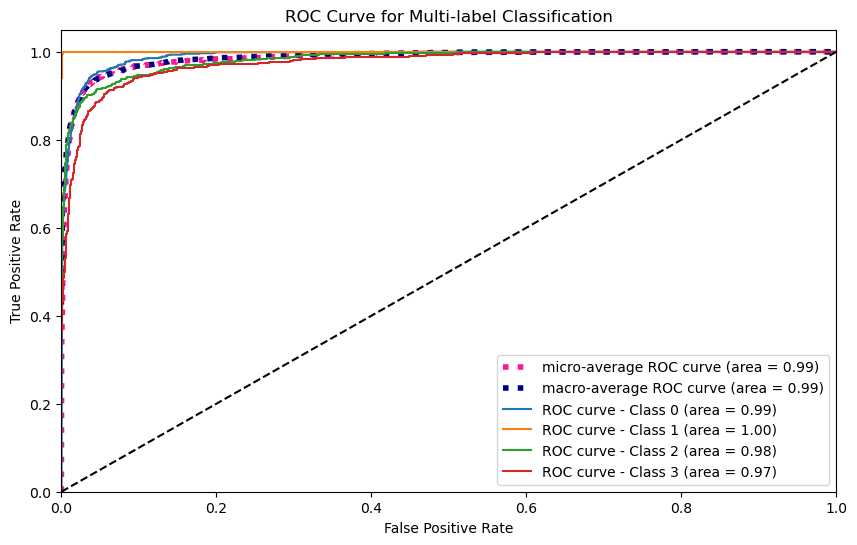

Average AUC: 0.9866570428097191


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for class_idx in range(all_outputs.shape[1]):
    fpr[class_idx], tpr[class_idx], _ = roc_curve(all_labels[:, class_idx], all_outputs[:, class_idx])
    roc_auc[class_idx] = auc(fpr[class_idx], tpr[class_idx])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(all_labels.ravel(), all_outputs.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(all_outputs.shape[1])]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(all_outputs.shape[1]):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= all_outputs.shape[1]
fpr_macro = all_fpr
tpr_macro = mean_tpr
roc_auc_macro = auc(fpr_macro, tpr_macro)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_micro, tpr_micro, label=f'micro-average ROC curve (area = {roc_auc_micro:.2f})', color='deeppink', linestyle=':', linewidth=4)
plt.plot(fpr_macro, tpr_macro, label=f'macro-average ROC curve (area = {roc_auc_macro:.2f})', color='navy', linestyle=':', linewidth=4)

for i in range(all_outputs.shape[1]):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve - Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-label Classification')
plt.legend(loc='lower right')
plt.savefig('accuracy_images_folder/ROC_curve.png', bbox_inches='tight')
plt.show()

# Compute and print average AUC
average_auc = sum(roc_auc.values()) / len(roc_auc)
print('Average AUC:', average_auc)
